In [1]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type, type_continuous
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug('BTCUSDT')
candlestick = Candlestick(merchandise_rate_id, 'month', 100, "DESC")

data_prices = candlestick.to_df()

# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
# data_prices['hour_return'] = data_prices['close'].pct_change() * 100
data_prices['month_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)
data_prices['month'] = data_prices[['open']].apply(
    lambda x: x.name.month, axis=1)
data_prices['year'] = data_prices[['open']].apply(
    lambda x: x.name.year, axis=1)

total = data_prices.iloc[:, 0].count()
last_date = data_prices.iloc[0].name.date()
first_date = data_prices.iloc[-1].name.date()

print(f"Thông tin: {total} hàng từ ngày {first_date} đến {last_date}")

data_prices['type'] = candlestick_type(data_prices)

data_prices['type_continuous'] = type_continuous(data_prices, "ASC")

print(data_prices)



Thông tin: 62 hàng từ ngày 2017-09-01 đến 2022-12-01
                               open      high     close       low     volumn  \
date                                                                           
2022-12-01 07:00:00+07:00  17165.50  18387.90  16696.00  16527.30  3584910.0   
2022-11-01 07:00:00+07:00  20490.70  21480.70  17163.60  15476.00  9127690.0   
2022-09-01 07:00:00+07:00  20048.40  22799.00  19422.60  18126.00  9838930.0   
2022-08-01 07:00:00+07:00  23296.40  25211.30  20050.00  19520.00  5692460.0   
2022-07-01 07:00:00+07:00  19942.20  24668.00  23293.30  18781.00  4983280.0   
...                             ...       ...       ...       ...        ...   
2018-01-01 07:00:00+07:00  13715.70  17176.20  10285.10   9035.00   816676.0   
2017-12-01 07:00:00+07:00   9837.00  19798.70  13716.40   9380.00   408477.0   
2017-11-01 07:00:00+07:00   6463.00  11300.00   9838.96   5325.01   108488.0   
2017-10-01 07:00:00+07:00   4378.49   6498.01   6463.00   4110.00  

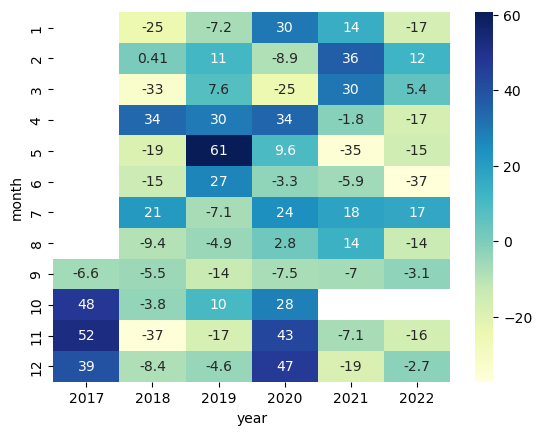

In [2]:
import seaborn as sns

month_price_retrun = data_prices.pivot(index='month', columns='year', values='month_return')

ax = sns.heatmap(month_price_retrun, annot=True, cmap="YlGnBu")

